In [15]:
import os 
import tarfile
import urllib

'''
In a typical environment, the data would be available in the relational database (or some kind of data store).
We are testing out the dataset sample from the purchase history from the company.
'''
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Sunnyryu/DaebakStudy/master/KrSuma/"
DATASET_PATH = os.path.join("Dataset", "Shopify_Orders_Sample_Jaesun" )
DATASET_URL = DOWNLOAD_ROOT + "Dataset/Shopify_Orders_Sample_Jaesun.tgz"

# function to fetch the dataset sample from github
def fetch_data(data_url = DATASET_URL, data_path = DATASET_PATH):
    os.makedirs(data_path, exist_ok=True)
    tgz_path = os.path.join(data_path, "Shopify_Orders_Sample_Jaesun.tgz")
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path=data_path)
    data_tgz.close()
    
import pandas as pd

# function to load the data
def load_purchase_data(data_path=DATASET_PATH):
    csv_path = os.path.join(data_path, "Shopify_Orders_Sample_Jaesun.csv")
    return pd.read_csv(csv_path)


In [16]:
# fetching the data, loading the data, and taking a quick look at the data structure.
fetch_data()
purchase = load_purchase_data()
purchase.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number
0,#DBB100411089KR,davidnguyen564@yahoo.com,paid,2020-03-02 21:35:31 -0500,unfulfilled,NaN,yes,USD,44.99,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#DBB100411090KR,sosa.stephany0@gmail.com,paid,2020-03-02 22:49:43 -0500,unfulfilled,NaN,yes,USD,52.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#DBB100411090KR,sosa.stephany0@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#DBB100411091KR,hottdamnn@gmail.com,paid,2020-03-02 23:47:02 -0500,unfulfilled,NaN,yes,USD,110.95,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#DBB100411091KR,hottdamnn@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# viewing the purchase info.
purchase.info()
'''
102 entries, 72 columns

Notice that most attribute has only partial nonnull values - meaning that many are missing this feature.
we need to take care of the empty featues.
'''

#viewing the currency's categories.
purchase["Currency"].value_counts()
'''
for example, we see that there is only USD category of 50. Meaning that the empty category probably is in Won.
'''

#view the summary of the numerical attributes of the dataset.
purchase.describe()
'''
out of 102 entries, only 50 were 'completed' (money being paid).
for example, most purchases had an average of 46.53 value
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         106 non-null    object 
 1   Email                        106 non-null    object 
 2   Financial Status             50 non-null     object 
 3   Paid at                      50 non-null     object 
 4   Fulfillment Status           50 non-null     object 
 5   Fulfilled at                 0 non-null      float64
 6   Accepts Marketing            50 non-null     object 
 7   Currency                     50 non-null     object 
 8   Subtotal                     50 non-null     float64
 9   Shipping                     50 non-null     float64
 10  Taxes                        50 non-null     float64
 11  Total                        50 non-null     float64
 12  Discount Code                9 non-null      object 
 13  Discount Amount     

,Fulfilled at,Subtotal,Shipping,Taxes,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Billing Company,...,Tax 1 Value,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number
count,0.0,50.000000,50.000000,50.000000,50.000000,50.000000,106.000000,106.000000,67.000000,0.0,...,3.000000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,6.000000e+00,0.0
mean,NaN,46.533000,0.400000,0.164400,47.097400,1.065400,1.018868,22.225849,25.196269,NaN,...,2.366667,1.12,NaN,NaN,NaN,NaN,NaN,NaN,3.195931e+10,NaN
std,NaN,24.866721,2.828427,0.753823,25.049043,2.627059,0.136705,12.747027,8.425079,NaN,...,1.230664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.509096e+10,NaN
min,NaN,13.990000,0.000000,0.000000,13.990000,0.000000,1.000000,4.990000,0.000000,NaN,...,1.160000,1.12,NaN,NaN,NaN,NaN,NaN,NaN,1.386417e+10,NaN
25%,NaN,32.972500,0.000000,0.000000,33.230000,0.000000,1.000000,13.990000,19.990000,NaN,...,1.740000,1.12,NaN,NaN,NaN,NaN,NaN,NaN,1.483301e+10,NaN
50%,NaN,46.970000,0.000000,0.000000,46.970000,0.000000,1.000000,19.990000,25.990000,NaN,...,2.320000,1.12,NaN,NaN,NaN,NaN,NaN,NaN,1.773954e+10,NaN
75%,NaN,49.990000,0.000000,0.000000,49.990000,0.000000,1.000000,24.990000,29.990000,NaN,...,2.970000,1.12,NaN,NaN,NaN,NaN,NaN,NaN,5.264056e+10,NaN
max,NaN,123.930000,20.000000,4.740000,123.930000,11.390000,2.000000,54.990000,40.990000,NaN,...,3.620000,1.12,NaN,NaN,NaN,NaN,NaN,NaN,6.427423e+10,NaN


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


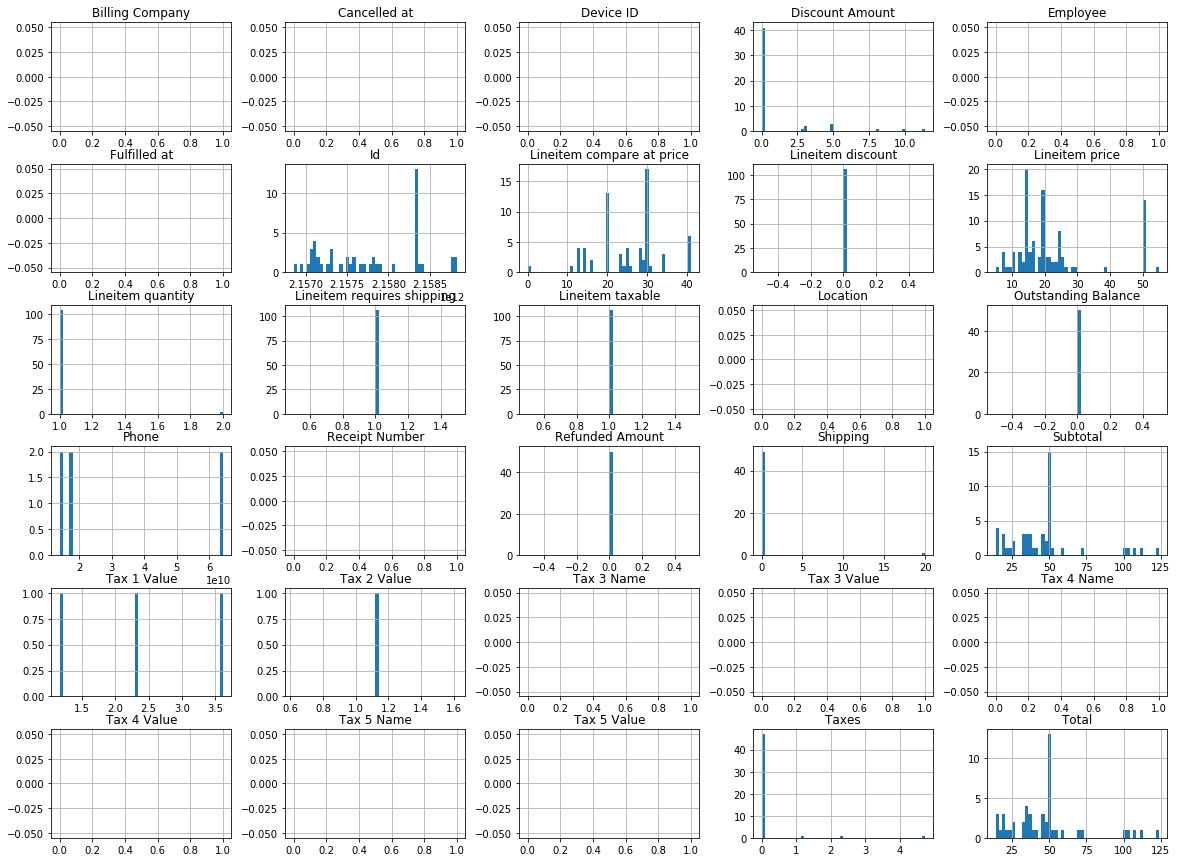

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
purchase.hist(bins=50, figsize=(20,15))
plt.show()
